<a href="https://colab.research.google.com/github/jroznerski/default_rate_calculation/blob/main/Default_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wczytanie bibliotek

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Wczytanie i oczyszczenie plików z Banku Danych Makroekonomicznych

Bilans płatniczy

In [ ]:
#jednostka mln EUR
bilans_platniczy = pd.read_csv('/content/drive/MyDrive/KPMG/Bilans płatniczy_kwartalne.csv',delimiter=';')
bilans_platniczy = bilans_platniczy.T
bilans_platniczy.columns = bilans_platniczy.iloc[0]
bilans_platniczy = bilans_platniczy.iloc[2:]
bilans_platniczy.reset_index(drop=False, inplace=True)
bilans_platniczy.index.name = None
bilans_platniczy = bilans_platniczy.rename(columns={'index':'Kwartał'})
bilans_platniczy['Kwartał'] = bilans_platniczy['Kwartał'].astype(str)
bilans_platniczy['Kwartał'] = bilans_platniczy['Kwartał'].str.split('.').str[0]
bilans_platniczy['Kwartał'] = bilans_platniczy['Kwartał'].astype(int)
bilans_platniczy = bilans_platniczy[(bilans_platniczy['Kwartał'] >= 2012) & (bilans_platniczy['Kwartał'] <= 2023)]
bilans_platniczy.reset_index(drop=True, inplace=True)
kwartaly = [f"{rok}Q{kwartal}" for rok in range(2012, 2024) for kwartal in range(1, 5)]
bilans_platniczy['Kwartał'] = kwartaly[:len(bilans_platniczy)]
bilans_platniczy.iloc[:, 1:] = bilans_platniczy.iloc[:, 1:].replace(',', '.', regex=True).astype(float)
kolumny_do_usuniecia = ['aktywa', 'pasywa']
bilans_platniczy = bilans_platniczy.drop(columns=kolumny_do_usuniecia)
bilans_platniczy.tail()

Unnamed: 0,Kwartał,Rachunek bieżący bilansu płatniczego (stan w końcu okresu),inwestycje bezpośrednie:,inwestycje portfelowe:,pozostałe inwestycje:,Saldo błędów i opuszczeń (stan w końcu okresu),Relacja rachunku bieżącego bilansu płatniczego do produktu krajowego brutto (stan w końcu okresu)
43,2022Q4,-1691.0,9207.0,6975.0,-3445.0,4773.0,-0.9
44,2023Q1,5089.0,11352.0,4535.0,7306.0,411.0,3.0
45,2023Q2,1181.0,4219.0,9937.0,3860.0,-281.0,0.9
46,2023Q3,1902.0,11612.0,4220.0,7190.0,-739.0,1.0
47,2023Q4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rozmiar = bilans_platniczy.shape

print(f"Liczba wierszy: {rozmiar[0]}, Liczba kolumn: {rozmiar[1]}")

Liczba wierszy: 48, Liczba kolumn: 7


In [ ]:
nazwy_kolumn = bilans_platniczy.columns.tolist()
print(nazwy_kolumn)

['Kwartał', 'Rachunek bieżący bilansu płatniczego (stan w końcu okresu)', 'inwestycje bezpośrednie:', 'inwestycje portfelowe:', 'pozostałe inwestycje:', 'Saldo błędów i opuszczeń (stan w końcu okresu)', 'Relacja rachunku bieżącego bilansu płatniczego do produktu krajowego brutto (stan w końcu okresu)']


In [ ]:
nan_values = bilans_platniczy.isna()
liczba_nan_w_kolumnach = nan_values.sum()
print(liczba_nan_w_kolumnach)

Unnamed: 0
Kwartał                                                                                              0
Rachunek bieżący bilansu płatniczego (stan w końcu okresu)                                           1
inwestycje bezpośrednie:                                                                             1
inwestycje portfelowe:                                                                               1
pozostałe inwestycje:                                                                                1
Saldo błędów i opuszczeń (stan w końcu okresu)                                                       1
Relacja rachunku bieżącego bilansu płatniczego do produktu krajowego brutto (stan w końcu okresu)    1
dtype: int64


In [ ]:
bilans_platniczy.iloc[:, 1:] = bilans_platniczy.iloc[:, 1:].replace(',', '.', regex=True).astype(float)

In [ ]:
bilans_platniczy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Kwartał                                                                                            48 non-null     object
 1   Rachunek bieżący bilansu płatniczego (stan w końcu okresu)                                         47 non-null     object
 2   inwestycje bezpośrednie:                                                                           47 non-null     object
 3   inwestycje portfelowe:                                                                             47 non-null     object
 4   pozostałe inwestycje:                                                                              47 non-null     object
 5   Sald

In [ ]:
#dane są w mln EUR, więc zamieniam na PLN
kolumny_do_pomnozenia = bilans_platniczy.columns[1:-1]

bilans_platniczy[kolumny_do_pomnozenia] = bilans_platniczy[kolumny_do_pomnozenia].apply(lambda x: x * 4.28e6)

bilans_platniczy.head()

Unnamed: 0,Kwartał,Rachunek bieżący bilansu płatniczego (stan w końcu okresu),inwestycje bezpośrednie:,inwestycje portfelowe:,pozostałe inwestycje:,Saldo błędów i opuszczeń (stan w końcu okresu),Relacja rachunku bieżącego bilansu płatniczego do produktu krajowego brutto (stan w końcu okresu)
0,2012Q1,-24507280000.0,-3466800000.0,20411320000.0,-15146920000.0,-4387000000.0,-6.5
1,2012Q2,-17650720000.0,2717800000.0,14021280000.0,-770400000.0,4588160000.0,-4.4
2,2012Q3,-16948800000.0,12972680000.0,17911800000.0,4849240000.0,-6377200000.0,-4.1
3,2012Q4,-8551440000.0,17346840000.0,16473720000.0,11294920000.0,509320000.0,-1.8
4,2013Q1,-9831160000.0,6154640000.0,18100120000.0,1737680000.0,-5936360000.0,-2.6


In [ ]:
for kolumna in bilans_platniczy.columns:
    print(f"Unikalne wartości w kolumnie '{kolumna}': {bilans_platniczy[kolumna].unique()}")

In [ ]:
for col in bilans_platniczy.columns[1:]:
    if pd.isnull(bilans_platniczy.at[47, col]):
        bilans_platniczy.at[47, col] = bilans_platniczy[col].iloc[:-1].mean()
bilans_platniczy.tail()

Unnamed: 0,Kwartał,Rachunek bieżący bilansu płatniczego (stan w końcu okresu),inwestycje bezpośrednie:,inwestycje portfelowe:,pozostałe inwestycje:,Saldo błędów i opuszczeń (stan w końcu okresu),Relacja rachunku bieżącego bilansu płatniczego do produktu krajowego brutto (stan w końcu okresu)
43,2022Q4,-7237480000.0,39405960000.0,29853000000.0,-14744600000.0,20428440000.0,-0.9
44,2023Q1,21780920000.0,48586560000.0,19409800000.0,31269680000.0,1759080000.0,3.0
45,2023Q2,5054680000.0,18057320000.0,42530360000.0,16520800000.0,-1202680000.0,0.9
46,2023Q3,8140560000.0,49699360000.0,18061600000.0,30773200000.0,-3162920000.0,1.0
47,2023Q4,-5762337021.276596,23501115744.680851,4077200851.06383,11826641702.127659,-1347653617.021277,-1.282979


Pieniądz:

In [ ]:
#mln zł
pieniadz = pd.read_csv('/content/drive/MyDrive/KPMG/Pieniądz_kwartalne.csv',delimiter=';')
pieniadz = pieniadz.T
pieniadz.columns = pieniadz.iloc[0]
pieniadz = pieniadz.drop(pieniadz.index[0])
pieniadz.reset_index(inplace=True)
pieniadz.rename(columns={'index': 'Kwartał'}, inplace=True)
pieniadz['Kwartał'] = pieniadz['Kwartał'].astype(str)
pieniadz['Kwartał'] = pieniadz['Kwartał'].str.split('.').str[0]
pieniadz['Kwartał'] = pieniadz['Kwartał'].astype(int)
pieniadz = pieniadz[(pieniadz['Kwartał'] >= 2012) & (pieniadz['Kwartał'] <= 2023)]
pieniadz.reset_index(drop=True, inplace=True)
kwartaly = [f"{rok}Q{kwartal}" for rok in range(2012, 2024) for kwartal in range(1, 5)]
pieniadz['Kwartał'] = kwartaly[:len(pieniadz)]
pieniadz.iloc[:, 1:] = pieniadz.iloc[:, 1:].replace(',', '.', regex=True).astype(float)
pieniadz.iloc[:, 1:] = pieniadz.iloc[:, 1:] * 1e6
pieniadz.head()

Unnamed: 0,Kwartał,Podaż pieniądza M3 (stan w końcu okresu)
0,2012Q1,874495800000.0
1,2012Q2,884720900000.0
2,2012Q3,892680000000.0
3,2012Q4,921411700000.0
4,2013Q1,932005500000.0


In [ ]:
rozmiar = pieniadz.shape

print(f"Liczba wierszy: {rozmiar[0]}, Liczba kolumn: {rozmiar[1]}")

Liczba wierszy: 48, Liczba kolumn: 2


In [ ]:
nazwy_kolumn = pieniadz.columns.tolist()
print(nazwy_kolumn)

['Kwartał', 'Podaż pieniądza M3 (stan w końcu okresu)']


In [ ]:
for kolumna in pieniadz.columns:
    print(f"Unikalne wartości w kolumnie '{kolumna}': {pieniadz[kolumna].unique()}")

Rachunki narodowe:

In [ ]:
#mln zł
rachunki_narodowe = pd.read_csv('/content/drive/MyDrive/KPMG/Rachunki narodowe_kwartalne.csv',delimiter=';')
rachunki_narodowe = rachunki_narodowe.T
rachunki_narodowe.columns = rachunki_narodowe.iloc[0]
rachunki_narodowe = rachunki_narodowe.drop(rachunki_narodowe.index[0])
rachunki_narodowe.reset_index(inplace=True)
rachunki_narodowe.rename(columns={'index': 'Kwartał'}, inplace=True)
rachunki_narodowe['Kwartał'] = rachunki_narodowe['Kwartał'].astype(str)
rachunki_narodowe['Kwartał'] = rachunki_narodowe['Kwartał'].str.split('.').str[0]
rachunki_narodowe['Kwartał'] = rachunki_narodowe['Kwartał'].astype(int)
rachunki_narodowe = rachunki_narodowe[(rachunki_narodowe['Kwartał'] >= 2012) & (rachunki_narodowe['Kwartał'] <= 2023)]
rachunki_narodowe.reset_index(drop=True, inplace=True)
kwartaly = [f"{rok}Q{kwartal}" for rok in range(2012, 2024) for kwartal in range(1, 5)]
rachunki_narodowe['Kwartał'] = kwartaly[:len(rachunki_narodowe)]
rachunki_narodowe.iloc[:, 1:] = rachunki_narodowe.iloc[:, 1:].replace(',', '.', regex=True).astype(float)
rachunki_narodowe.iloc[:, 1:] = rachunki_narodowe.iloc[:, 1:] * 1e6
rachunki_narodowe.head()

﻿Wskaźnik,Kwartał,Produkt krajowy brutto (ceny bieżące)
0,2012Q1,374631400000.0
1,2012Q2,394901600000.0
2,2012Q3,398273000000.0
3,2012Q4,444932700000.0
4,2013Q1,374894100000.0


In [ ]:
rozmiar = rachunki_narodowe.shape

print(f"Liczba wierszy: {rozmiar[0]}, Liczba kolumn: {rozmiar[1]}")

Liczba wierszy: 48, Liczba kolumn: 2


In [ ]:
for kolumna in rachunki_narodowe.columns:
    print(f"Unikalne wartości w kolumnie '{kolumna}': {rachunki_narodowe[kolumna].unique()}")

Rynek pracy:

In [ ]:
rynek_pracy = pd.read_csv('/content/drive/MyDrive/KPMG/Rynek pracy_kwartalne.csv',delimiter=';')
rynek_pracy = rynek_pracy.T
rynek_pracy.columns = rynek_pracy.iloc[0]
rynek_pracy = rynek_pracy.drop(rynek_pracy.index[0])
rynek_pracy.reset_index(inplace=True)
rynek_pracy.rename(columns={'index': 'Kwartał'}, inplace=True)
rynek_pracy['Kwartał'] = rynek_pracy['Kwartał'].astype(str)
rynek_pracy['Kwartał'] = rynek_pracy['Kwartał'].str.split('.').str[0]
rynek_pracy['Kwartał'] = rynek_pracy['Kwartał'].astype(int)
rynek_pracy = rynek_pracy[(rynek_pracy['Kwartał'] >= 2012) & (rynek_pracy['Kwartał'] <= 2023)]
rynek_pracy.reset_index(drop=True, inplace=True)
kwartaly = [f"{rok}Q{kwartal}" for rok in range(2012, 2024) for kwartal in range(1, 5)]
rynek_pracy['Kwartał'] = kwartaly[:len(rynek_pracy)]
rynek_pracy.drop(rynek_pracy.columns[1], axis=1, inplace=True)
rynek_pracy.iloc[:, 1:] = rynek_pracy.iloc[:, 1:].replace(',', '.', regex=True).astype(float)
rynek_pracy.head()

Unnamed: 0,Kwartał,Stopa bezrobocia rejestrowanego (stan w końcu okresu)
0,2012Q1,13.3
1,2012Q2,12.3
2,2012Q3,12.4
3,2012Q4,13.4
4,2013Q1,14.3


In [ ]:
rozmiar = rynek_pracy.shape

print(f"Liczba wierszy: {rozmiar[0]}, Liczba kolumn: {rozmiar[1]}")

Liczba wierszy: 48, Liczba kolumn: 2


In [ ]:
for kolumna in rynek_pracy.columns:
    print(f"Unikalne wartości w kolumnie '{kolumna}': {rynek_pracy[kolumna].unique()}")

Warunki życia ludności:

In [ ]:
#zł
warunki_zycia = pd.read_csv('/content/drive/MyDrive/KPMG/Warunki życia ludności_kwartalne.csv',delimiter=';')
warunki_zycia = warunki_zycia.T
warunki_zycia.columns = warunki_zycia.iloc[0]
warunki_zycia = warunki_zycia.drop(warunki_zycia.index[0])
warunki_zycia.reset_index(inplace=True)
warunki_zycia.rename(columns={'index': 'Kwartał'}, inplace=True)
warunki_zycia['Kwartał'] = warunki_zycia['Kwartał'].astype(str)
warunki_zycia['Kwartał'] = warunki_zycia['Kwartał'].str.split('.').str[0]
warunki_zycia['Kwartał'] = warunki_zycia['Kwartał'].astype(int)
warunki_zycia = warunki_zycia[(warunki_zycia['Kwartał'] >= 2012) & (warunki_zycia['Kwartał'] <= 2023)]
warunki_zycia.reset_index(drop=True, inplace=True)
kwartaly = [f"{rok}Q{kwartal}" for rok in range(2012, 2024) for kwartal in range(1, 5)]
warunki_zycia['Kwartał'] = kwartaly[:len(warunki_zycia)]
warunki_zycia.iloc[:, 1:] = warunki_zycia.iloc[:, 1:].replace(',', '.', regex=True).astype(float)
warunki_zycia.head()

Unnamed: 0,Kwartał,Przeciętne miesięczne wynagrodzenie nominalne brutto w gospodarce narodowej,Przeciętna miesięczna nominalna emerytura i renta brutto z pozarolniczego systemu ubezpieczeń społecznych
0,2012Q1,3646.09,1775.07
1,2012Q2,3496.82,1832.96
2,2012Q3,3510.22,1834.59
3,2012Q4,3690.3,1841.31
4,2013Q1,3740.05,1877.38


In [ ]:
rozmiar = warunki_zycia.shape

print(f"Liczba wierszy: {rozmiar[0]}, Liczba kolumn: {rozmiar[1]}")

Liczba wierszy: 48, Liczba kolumn: 3


In [ ]:
for kolumna in warunki_zycia.columns:
    print(f"Unikalne wartości w kolumnie '{kolumna}': {warunki_zycia[kolumna].unique()}")

Wskaźniki cen:

In [ ]:
wskazniki_cen = pd.read_csv('/content/drive/MyDrive/KPMG/Wskaźniki cen_kwartalne.csv',delimiter=';')
wskazniki_cen = wskazniki_cen.T
wskazniki_cen.columns = wskazniki_cen.iloc[0]
wskazniki_cen = wskazniki_cen.drop(wskazniki_cen.index[0])
wskazniki_cen.reset_index(inplace=True)
wskazniki_cen.rename(columns={'index': 'Kwartał'}, inplace=True)
wskazniki_cen['Kwartał'] = wskazniki_cen['Kwartał'].astype(str)
wskazniki_cen['Kwartał'] = wskazniki_cen['Kwartał'].str.split('.').str[0]
wskazniki_cen['Kwartał'] = wskazniki_cen['Kwartał'].astype(int)
wskazniki_cen = wskazniki_cen[(wskazniki_cen['Kwartał'] >= 2012) & (wskazniki_cen['Kwartał'] <= 2023)]
wskazniki_cen.reset_index(drop=True, inplace=True)
kwartaly = [f"{rok}Q{kwartal}" for rok in range(2012, 2024) for kwartal in range(1, 5)]
wskazniki_cen['Kwartał'] = kwartaly[:len(wskazniki_cen)]
wskazniki_cen.iloc[:, 1:] = wskazniki_cen.iloc[:, 1:].replace(',', '.', regex=True).astype(float)
wskazniki_cen.head()

Unnamed: 0,Kwartał,Wskaźniki cen produkcji budowlano-montażowej,Wskaźniki cen towarów i usług konsumpcyjnych
0,2012Q1,101.4,104.1
1,2012Q2,100.8,104.0
2,2012Q3,99.7,103.9
3,2012Q4,98.9,102.9
4,2013Q1,98.4,101.3


In [ ]:
rozmiar = wskazniki_cen.shape

print(f"Liczba wierszy: {rozmiar[0]}, Liczba kolumn: {rozmiar[1]}")

Liczba wierszy: 48, Liczba kolumn: 3


In [ ]:
for kolumna in warunki_zycia.columns:
    print(f"Unikalne wartości w kolumnie '{kolumna}': {warunki_zycia[kolumna].unique()}")

Połączenie wszystkich:

In [ ]:
from functools import reduce

dfs = [bilans_platniczy, pieniadz, rachunki_narodowe, rynek_pracy, warunki_zycia, wskazniki_cen]

combined_df = reduce(lambda left,right: pd.merge(left,right,on='Kwartał', how='outer'), dfs)

combined_df.head()

,Kwartał,Rachunek bieżący bilansu płatniczego (stan w końcu okresu),inwestycje bezpośrednie:,inwestycje portfelowe:,pozostałe inwestycje:,Saldo błędów i opuszczeń (stan w końcu okresu),Relacja rachunku bieżącego bilansu płatniczego do produktu krajowego brutto (stan w końcu okresu),Podaż pieniądza M3 (stan w końcu okresu),Produkt krajowy brutto (ceny bieżące),Stopa bezrobocia rejestrowanego (stan w końcu okresu),Przeciętne miesięczne wynagrodzenie nominalne brutto w gospodarce narodowej,Przeciętna miesięczna nominalna emerytura i renta brutto z pozarolniczego systemu ubezpieczeń społecznych,Wskaźniki cen produkcji budowlano-montażowej,Wskaźniki cen towarów i usług konsumpcyjnych
0,2012Q1,-24507280000.0,-3466800000.0,20411320000.0,-15146920000.0,-4387000000.0,-6.5,874495800000.0,374631400000.0,13.3,3646.09,1775.07,101.4,104.1
1,2012Q2,-17650720000.0,2717800000.0,14021280000.0,-770400000.0,4588160000.0,-4.4,884720900000.0,394901600000.0,12.3,3496.82,1832.96,100.8,104.0
2,2012Q3,-16948800000.0,12972680000.0,17911800000.0,4849240000.0,-6377200000.0,-4.1,892680000000.0,398273000000.0,12.4,3510.22,1834.59,99.7,103.9
3,2012Q4,-8551440000.0,17346840000.0,16473720000.0,11294920000.0,509320000.0,-1.8,921411700000.0,444932700000.0,13.4,3690.3,1841.31,98.9,102.9
4,2013Q1,-9831160000.0,6154640000.0,18100120000.0,1737680000.0,-5936360000.0,-2.6,932005500000.0,374894100000.0,14.3,3740.05,1877.38,98.4,101.3


In [ ]:
combined_df.to_excel('/content/drive/MyDrive/KPMG/data.xlsx', index=False)

Dodanie danych z pliku Default Rate:

In [ ]:
default_rate_df = pd.read_excel('/content/drive/MyDrive/KPMG/Dane_DR.xlsx')
default_rate_df = default_rate_df.rename(columns={'data': 'Kwartał'})
default_rate_df.head()

,Kwartał,default_rate
0,2012Q1,0.068074
1,2012Q2,0.075552
2,2012Q3,0.078832
3,2012Q4,0.078038
4,2013Q1,0.081686


In [ ]:
df = pd.merge(combined_df, default_rate_df, on='Kwartał', how='left')
#uporządkowanie nazw kolumn
nowe_nazwy_kolumn = {
    'Rachunek bieżący bilansu płatniczego (stan w końcu okresu)': 'Rachunek biezacy bilansu płatniczego',
    'inwestycje bezpośrednie:': 'Inwestycje bezposrednie',
    'inwestycje portfelowe:': 'Inwestycje portfelowe',
    'pozostałe inwestycje:' : 'Pozostałe inwestycje',
    'Saldo błędów i opuszczeń (stan w końcu okresu)' : 'Saldo błędów i opuszczeń',
    'Relacja rachunku bieżącego bilansu płatniczego do produktu krajowego brutto (stan w końcu okresu)' : 'Relacja rachunku bieżącego bilansu płatniczego do PKB',
    'Podaż pieniądza M3 (stan w końcu okresu)' : 'Podaż pieniądza M3',
    'Produkt krajowy brutto (ceny bieżące)' : 'Produkt krajowy brutto',
    'Stopa bezrobocia rejestrowanego (stan w końcu okresu)' : 'Stopa bezrobocia rejestrowanego',
    'default_rate' : 'Default Rate',
    'Przeciętne miesięczne wynagrodzenie nominalne brutto w gospodarce narodowej' : 'Przeciętne miesięczne wynagrodzenie nominalne',
    'Przeciętna miesięczna nominalna emerytura i renta brutto z pozarolniczego systemu ubezpieczeń społecznych' : 'Przeciętna miesięczna nominalna emerytura i renta'
}

df = df.rename(columns=nowe_nazwy_kolumn)

df.head()

,Kwartał,Rachunek biezacy bilansu płatniczego,Inwestycje bezposrednie,Inwestycje portfelowe,Pozostałe inwestycje,Saldo błędów i opuszczeń,Relacja rachunku bieżącego bilansu płatniczego do PKB,Podaż pieniądza M3,Produkt krajowy brutto,Stopa bezrobocia rejestrowanego,Przeciętne miesięczne wynagrodzenie nominalne,Przeciętna miesięczna nominalna emerytura i renta,Wskaźniki cen produkcji budowlano-montażowej,Wskaźniki cen towarów i usług konsumpcyjnych,Default Rate
0,2012Q1,-24507280000.0,-3466800000.0,20411320000.0,-15146920000.0,-4387000000.0,-6.5,874495800000.0,374631400000.0,13.3,3646.09,1775.07,101.4,104.1,0.068074
1,2012Q2,-17650720000.0,2717800000.0,14021280000.0,-770400000.0,4588160000.0,-4.4,884720900000.0,394901600000.0,12.3,3496.82,1832.96,100.8,104.0,0.075552
2,2012Q3,-16948800000.0,12972680000.0,17911800000.0,4849240000.0,-6377200000.0,-4.1,892680000000.0,398273000000.0,12.4,3510.22,1834.59,99.7,103.9,0.078832
3,2012Q4,-8551440000.0,17346840000.0,16473720000.0,11294920000.0,509320000.0,-1.8,921411700000.0,444932700000.0,13.4,3690.3,1841.31,98.9,102.9,0.078038
4,2013Q1,-9831160000.0,6154640000.0,18100120000.0,1737680000.0,-5936360000.0,-2.6,932005500000.0,374894100000.0,14.3,3740.05,1877.38,98.4,101.3,0.081686


In [ ]:
missing_values = df.isnull().sum()

print("Liczba brakujących wartości dla każdej kolumny:")
print(missing_values)

Liczba brakujących wartości dla każdej kolumny:
Kwartał                                                  0
Rachunek biezacy bilansu płatniczego                     0
Inwestycje bezposrednie                                  0
Inwestycje portfelowe                                    0
Pozostałe inwestycje                                     0
Saldo błędów i opuszczeń                                 0
Relacja rachunku bieżącego bilansu płatniczego do PKB    0
Podaż pieniądza M3                                       0
Produkt krajowy brutto                                   0
Stopa bezrobocia rejestrowanego                          0
Przeciętne miesięczne wynagrodzenie nominalne            0
Przeciętna miesięczna nominalna emerytura i renta        0
Wskaźniki cen produkcji budowlano-montażowej             0
Wskaźniki cen towarów i usług konsumpcyjnych             0
Default Rate                                             1
dtype: int64


In [ ]:
indeks_do_usuniecia = df.loc[df['Kwartał'] == '2015Q2'].index

df.drop(indeks_do_usuniecia, inplace=True)

df.reset_index(drop=True, inplace=True)

In [ ]:
unique_default_rate_values = df['Default Rate'].unique()
print(unique_default_rate_values)

[0.06807393 0.07555233 0.07883234 0.078038   0.08168612 0.07880551
 0.07541766 0.06733842 0.06852556 0.04952198 0.05152556 0.05512505
 0.06127333 0.05507063 0.04571501 0.03944446 0.05081619 0.05683498
 0.05213026 0.04751287 0.04277938 0.04357348 0.03324489 0.02962625
 0.02605824 0.03224947 0.02081619 0.03930742 0.03224555 0.04081908
 0.04716213 0.060987   0.14804182 0.07053321 0.0740939  0.06545383
 0.06741721 0.06508049 0.06263943 0.06035525 0.06071415 0.05891801
 0.06993452 0.07480551 0.06711879 0.05008542 0.05649702]


In [ ]:
brakujace_dane = df.isnull().sum()
brakujace_dane[brakujace_dane > 0]

Series([], dtype: int64)

Wymiar ramki danych

In [ ]:
df.shape

(47, 15)

EDA

In [ ]:
for col in df.columns:
    if col != 'Kwartał':
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Kwartał                                                47 non-null     object 
 1   Rachunek biezacy bilansu płatniczego                   47 non-null     float64
 2   Inwestycje bezposrednie                                47 non-null     float64
 3   Inwestycje portfelowe                                  47 non-null     float64
 4   Pozostałe inwestycje                                   47 non-null     float64
 5   Saldo błędów i opuszczeń                               47 non-null     float64
 6   Relacja rachunku bieżącego bilansu płatniczego do PKB  47 non-null     float64
 7   Podaż pieniądza M3                                     47 non-null     float64
 8   Produkt krajowy brutto                              

In [ ]:
df.describe()

,Rachunek biezacy bilansu płatniczego,Inwestycje bezposrednie,Inwestycje portfelowe,Pozostałe inwestycje,Saldo błędów i opuszczeń,Relacja rachunku bieżącego bilansu płatniczego do PKB,Podaż pieniądza M3,Produkt krajowy brutto,Stopa bezrobocia rejestrowanego,Przeciętne miesięczne wynagrodzenie nominalne,Przeciętna miesięczna nominalna emerytura i renta,Wskaźniki cen produkcji budowlano-montażowej,Wskaźniki cen towarów i usług konsumpcyjnych,Default Rate
count,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,47.000000,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,-5.682141e+09,2.382876e+10,3.846683e+09,1.172121e+10,-1.381791e+09,-1.265595,1.442200e+12,5.530222e+11,8.191489,4833.379574,2328.139149,102.800000,103.704255,0.058251
std,1.192184e+10,1.917873e+10,1.754070e+10,2.134099e+10,6.705888e+09,2.281421,4.329852e+11,1.467613e+11,3.110349,1120.724925,437.634613,4.511627,4.851085,0.020460
min,-2.450728e+10,-1.791180e+10,-3.230116e+10,-2.161828e+10,-1.465044e+10,-6.500000,8.744958e+11,3.746314e+11,5.000000,3496.820000,1775.070000,98.000000,98.500000,0.020816
25%,-1.410902e+10,1.233924e+10,-6.201720e+09,-3.873400e+08,-4.481160e+09,-3.000000,1.062529e+12,4.429650e+11,5.750000,3919.000000,2011.735000,99.450000,100.650000,0.046439
50%,-7.237480e+09,2.350112e+10,3.402600e+09,6.608320e+09,-2.011600e+09,-1.500000,1.325796e+12,5.228551e+11,6.800000,4521.080000,2183.640000,101.700000,102.200000,0.058918
75%,2.067240e+09,3.319568e+10,1.765072e+10,1.796530e+10,1.643520e+09,0.400000,1.842608e+12,6.297902e+11,11.450000,5481.250000,2528.700000,103.550000,104.300000,0.068300
max,2.587688e+10,7.397124e+10,4.253036e+10,6.957140e+10,2.042844e+10,4.100000,2.268269e+12,9.342231e+11,14.300000,7540.360000,3459.690000,114.800000,117.300000,0.148042


Histogramy prezentowały rozkład każdego z wybranych czynników makroekonomicznych oraz Default Rate. Analiza histogramów pozwala na ocenę normalności rozkładów, a także identyfikację skośności i występowania wartości odstających.

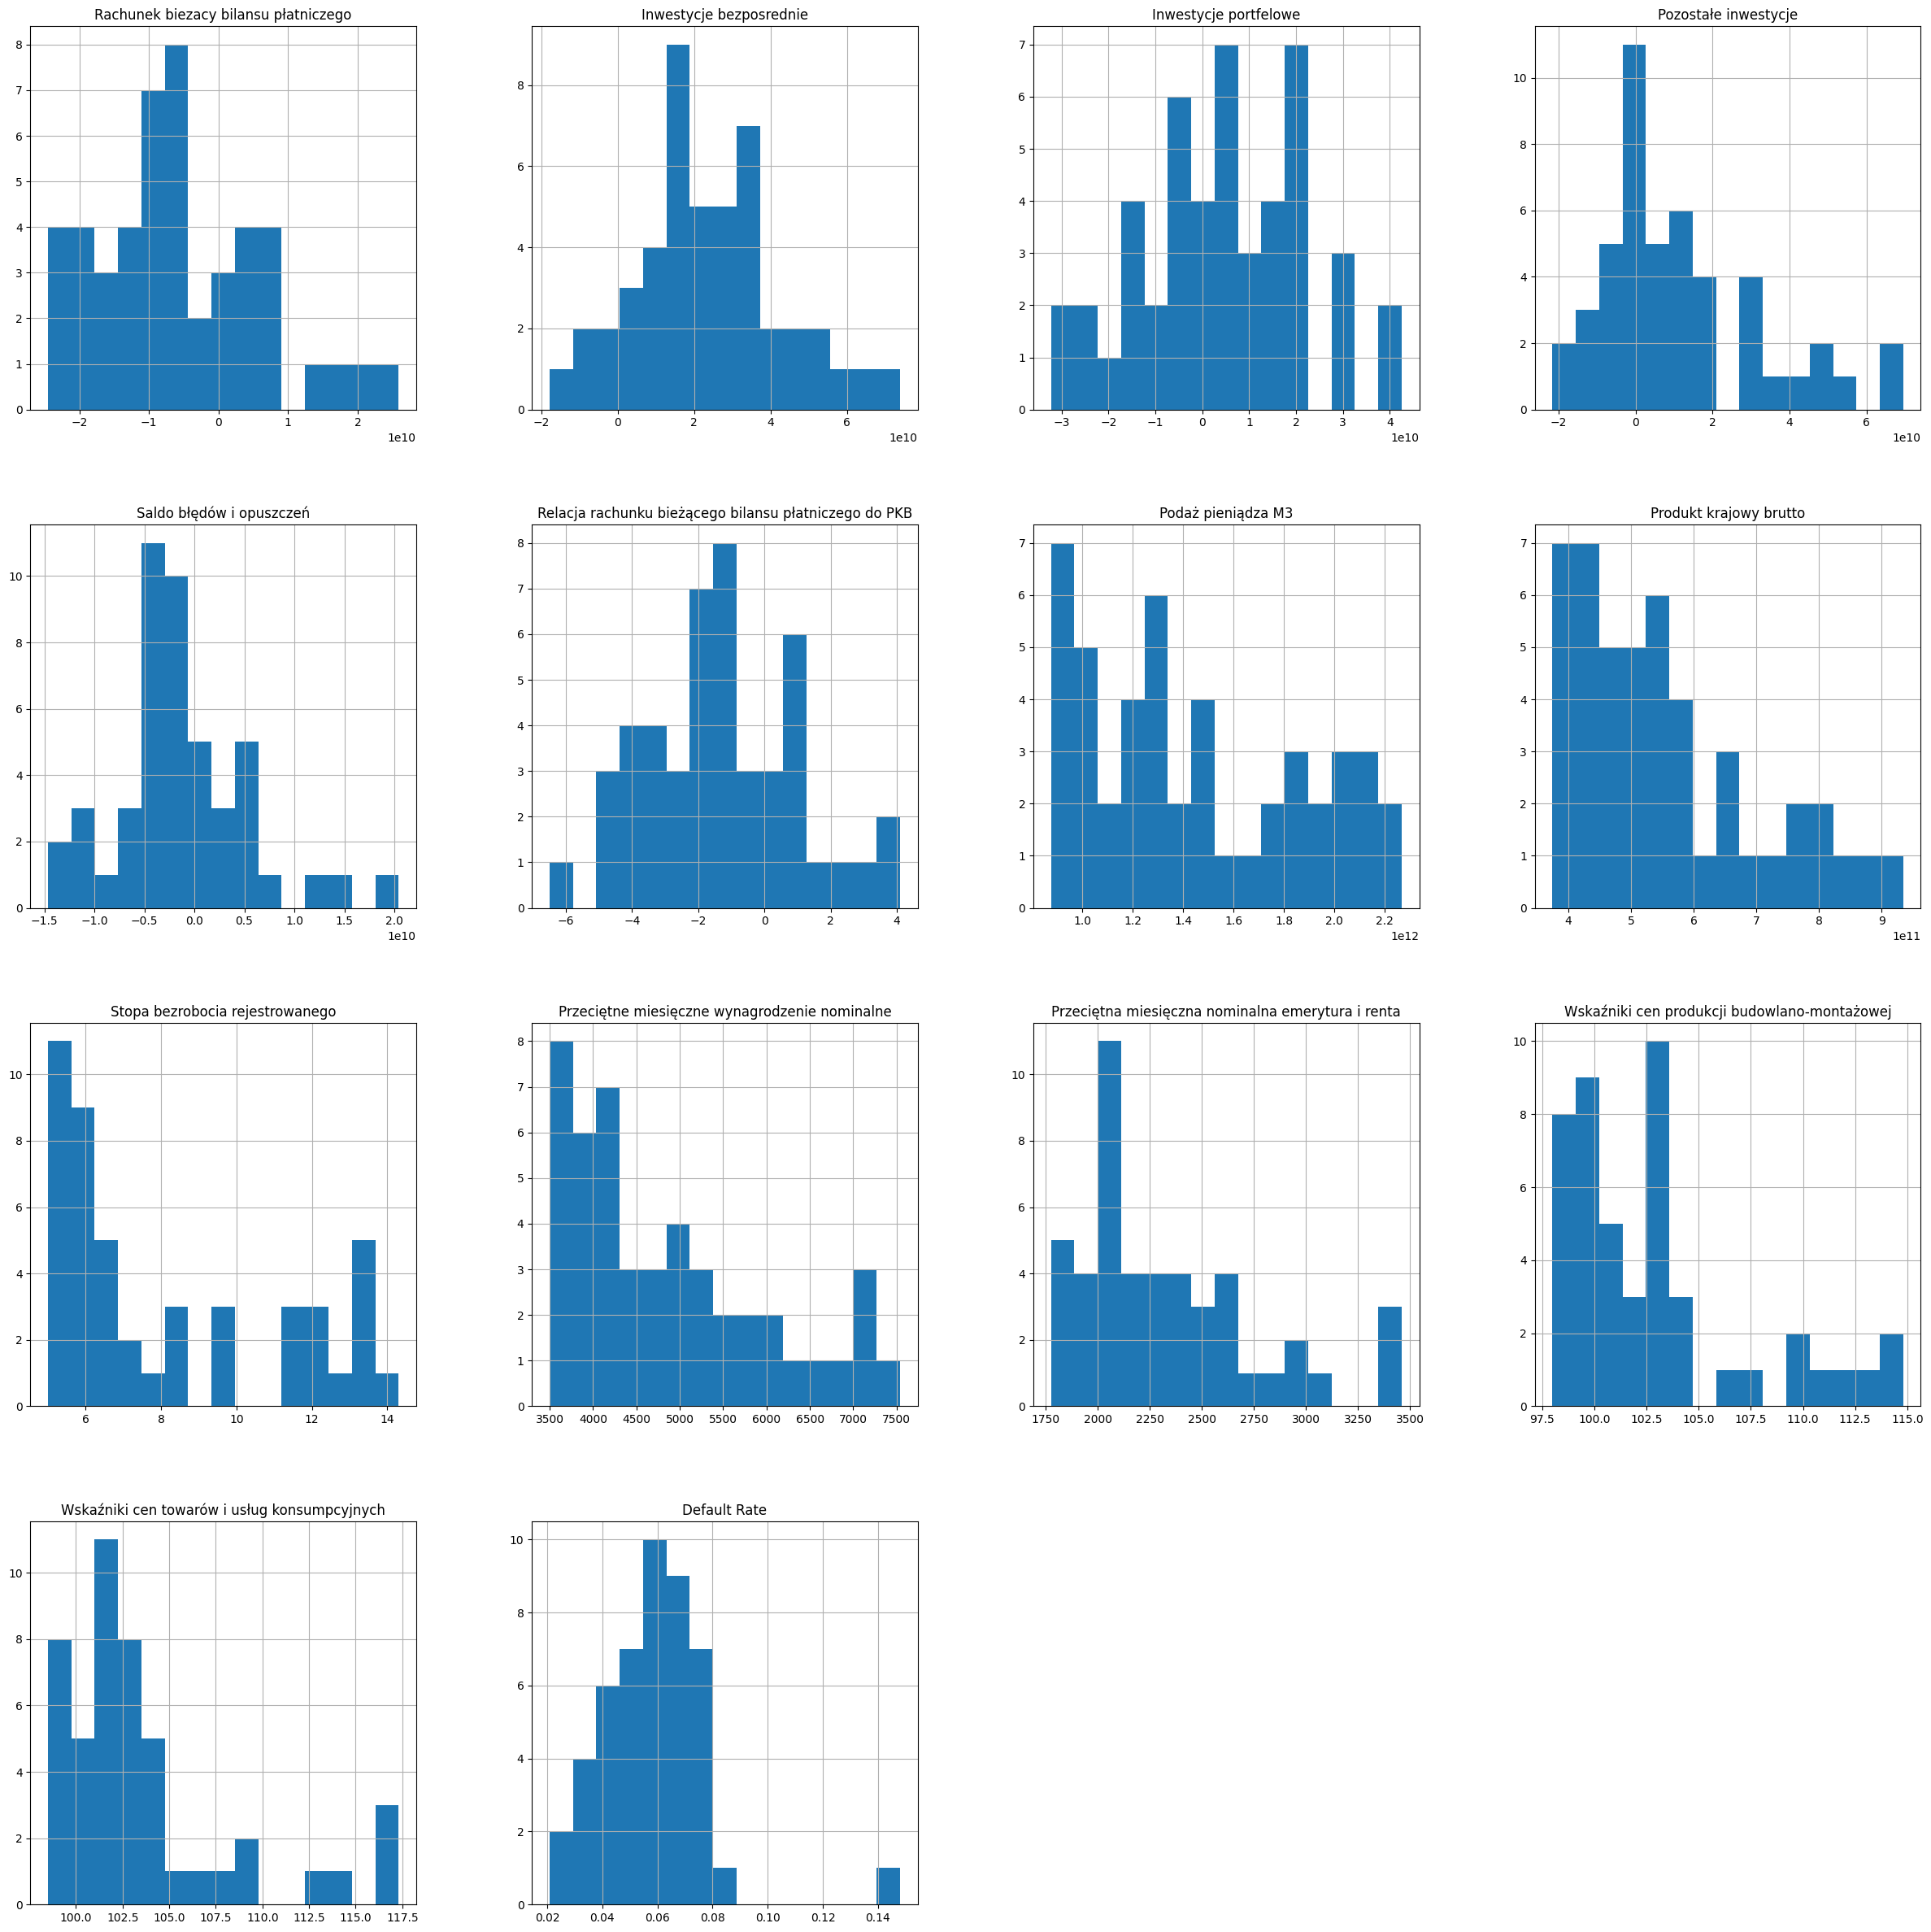

In [ ]:
df.hist(bins=15, figsize=(30, 30))
plt.show()

Wykresy pudełkowe, które dostarczają informacji o medianie, kwartylach i wartościach odstających dla każdej zmiennej.

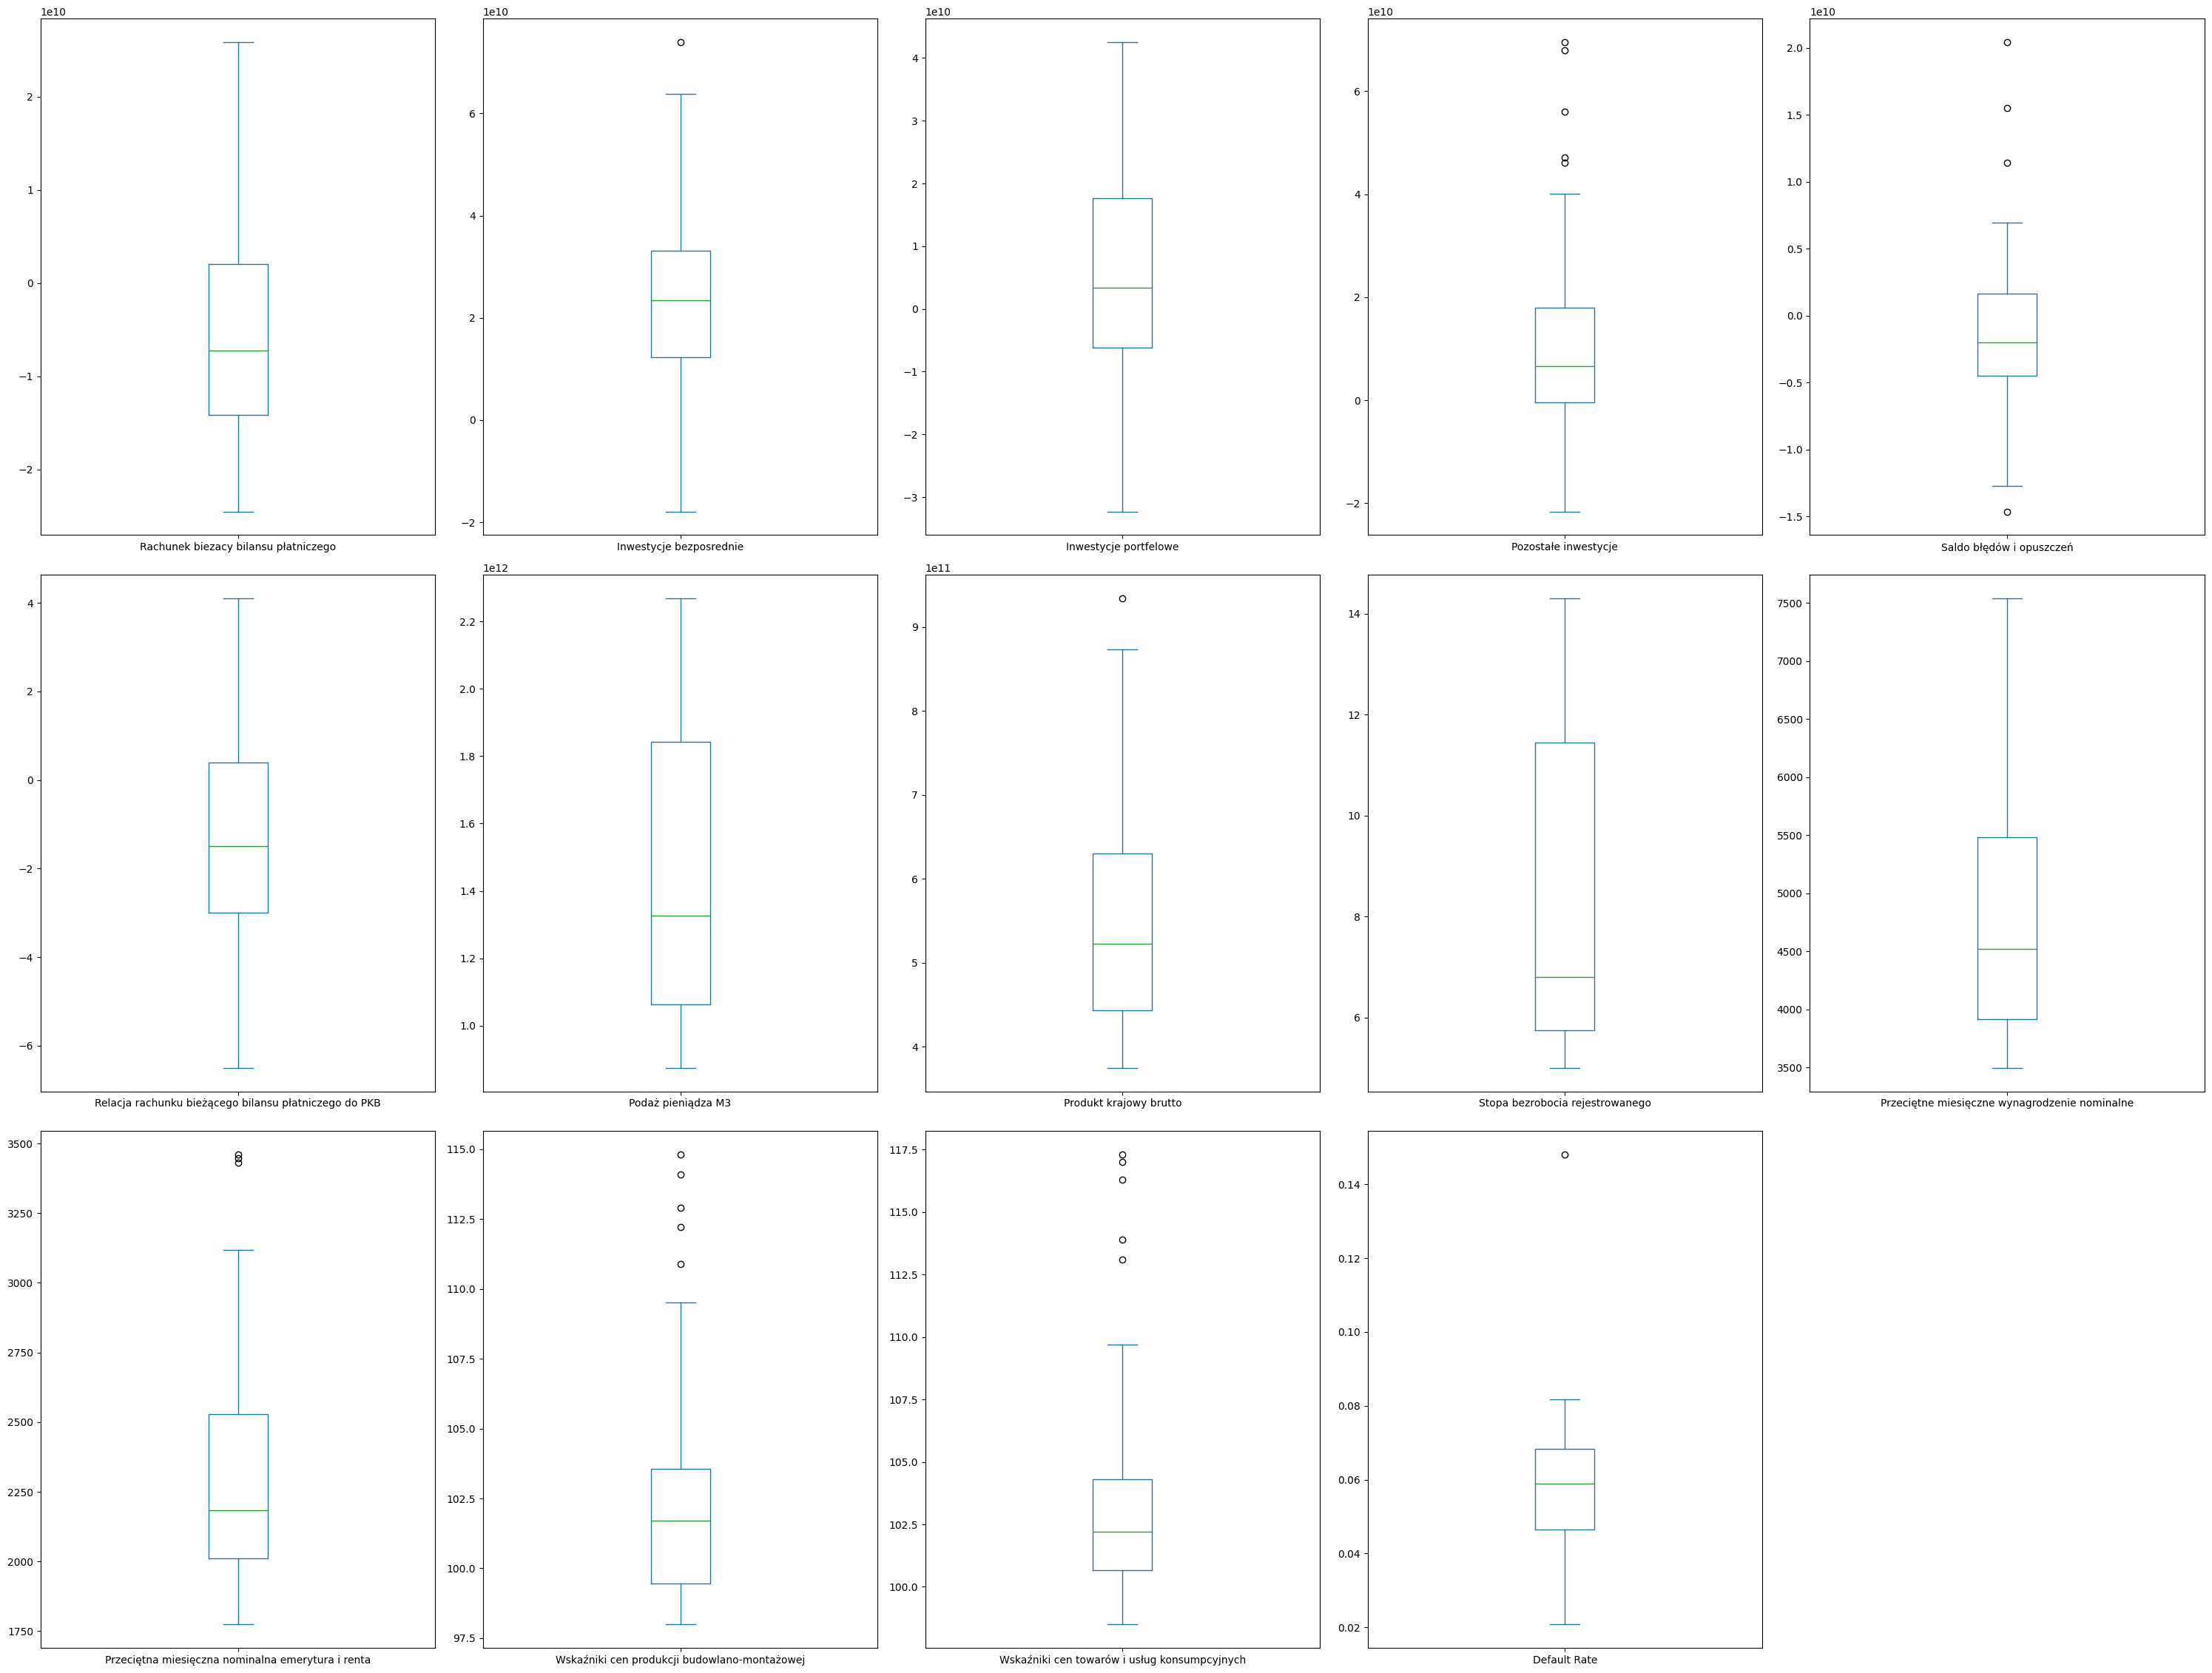

In [ ]:
df.plot(kind='box', subplots=True, layout=(4, 5), figsize=(30, 30))
plt.tight_layout()
plt.show()

Macierz korelacji, która przedstawia współczynnik korelacji Pearsona między parami zmiennych. Jest to kluczowe narzędzie do identyfikacji potencjalnych zależności między czynnikami makroekonomicznymi, a Default Rate

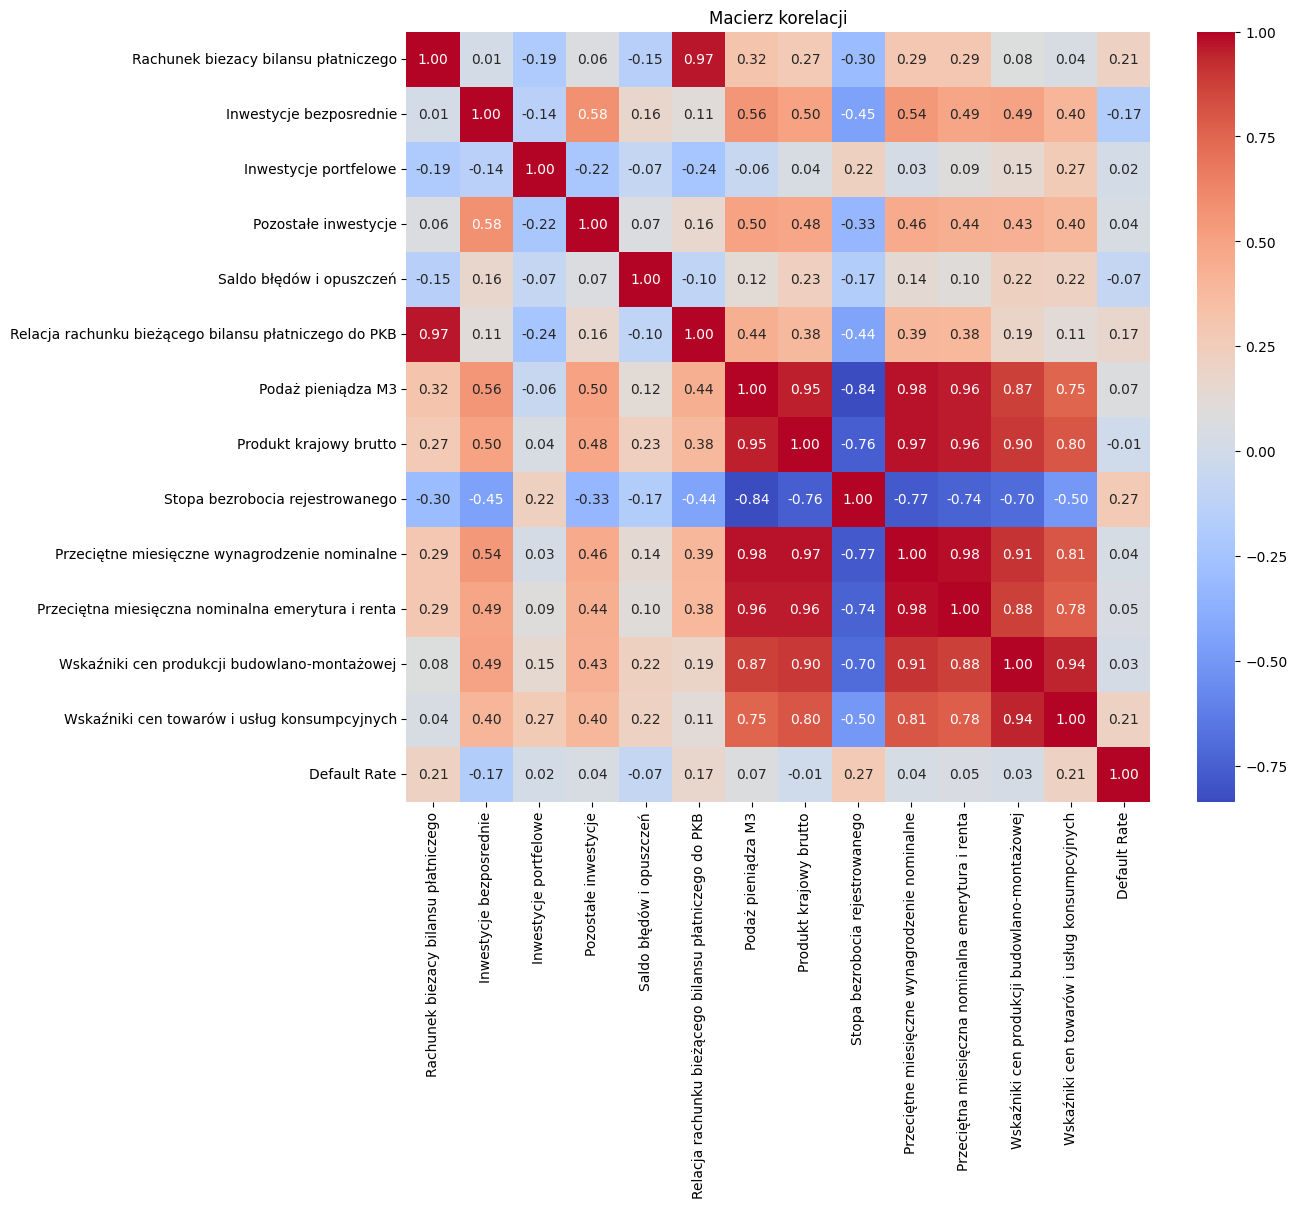

In [ ]:
df_bez_kwartału = df.drop('Kwartał', axis=1)

macierz_korelacji = df_bez_kwartału.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(macierz_korelacji, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

In [ ]:
wysoka_korelacja = 0.8

maska_wysokiej_korelacji = (macierz_korelacji.abs() > wysoka_korelacja) & (macierz_korelacji.abs() < 1.0)

pary_wysokiej_korelacji = [(i, j) for i in range(macierz_korelacji.shape[0]) for j in range(i+1, macierz_korelacji.shape[1]) if maska_wysokiej_korelacji.iloc[i, j]]
print("Pary zmiennych o wysokiej korelacji:")
for i, j in pary_wysokiej_korelacji:
    print(f"{macierz_korelacji.index[i]} - {macierz_korelacji.columns[j]}")

Pary zmiennych o wysokiej korelacji:
Rachunek biezacy bilansu płatniczego - Relacja rachunku bieżącego bilansu płatniczego do PKB
Podaż pieniądza M3 - Produkt krajowy brutto
Podaż pieniądza M3 - Stopa bezrobocia rejestrowanego
Podaż pieniądza M3 - Przeciętne miesięczne wynagrodzenie nominalne
Podaż pieniądza M3 - Przeciętna miesięczna nominalna emerytura i renta
Podaż pieniądza M3 - Wskaźniki cen produkcji budowlano-montażowej
Produkt krajowy brutto - Przeciętne miesięczne wynagrodzenie nominalne
Produkt krajowy brutto - Przeciętna miesięczna nominalna emerytura i renta
Produkt krajowy brutto - Wskaźniki cen produkcji budowlano-montażowej
Przeciętne miesięczne wynagrodzenie nominalne - Przeciętna miesięczna nominalna emerytura i renta
Przeciętne miesięczne wynagrodzenie nominalne - Wskaźniki cen produkcji budowlano-montażowej
Przeciętne miesięczne wynagrodzenie nominalne - Wskaźniki cen towarów i usług konsumpcyjnych
Przeciętna miesięczna nominalna emerytura i renta - Wskaźniki cen pro

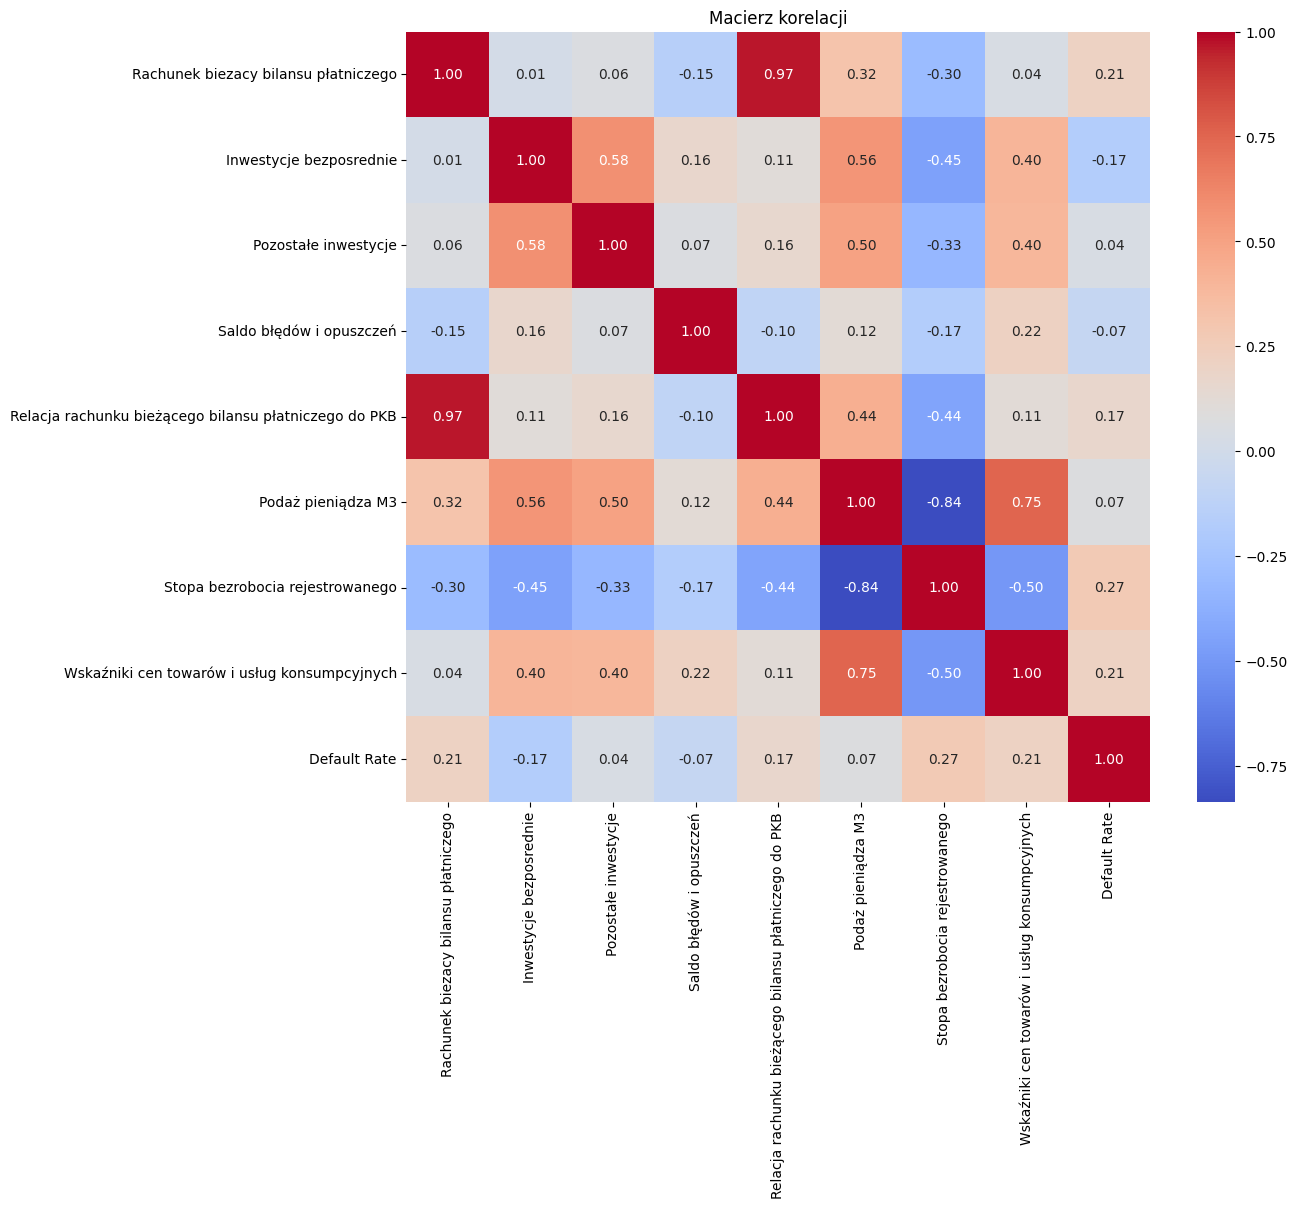

In [ ]:
df_corr = df.drop(['Kwartał','Wskaźniki cen produkcji budowlano-montażowej','Przeciętna miesięczna nominalna emerytura i renta','Produkt krajowy brutto','Przeciętne miesięczne wynagrodzenie nominalne','Inwestycje portfelowe'],axis=1)
macierz_korelacji = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(macierz_korelacji, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

Modele LinearRegression, RandomForestRegressor, GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Kwartał', 'Default Rate'], axis=1)
y = df['Default Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score

score_metric_mse = 'neg_mean_squared_error'
score_metric_r2 = 'r2'

scores_model1_mse = cross_val_score(model1, X_train, y_train, cv=5, scoring=score_metric_mse)
scores_model2_mse = cross_val_score(model2, X_train, y_train, cv=5, scoring=score_metric_mse)
scores_model3_mse = cross_val_score(model3, X_train, y_train, cv=5, scoring=score_metric_mse)

mean_score_model1_mse = -np.mean(scores_model1_mse)
mean_score_model2_mse = -np.mean(scores_model2_mse)
mean_score_model3_mse = -np.mean(scores_model3_mse)

scores_model1_r2 = cross_val_score(model1, X_train, y_train, cv=5, scoring=score_metric_r2)
scores_model2_r2 = cross_val_score(model2, X_train, y_train, cv=5, scoring=score_metric_r2)
scores_model3_r2 = cross_val_score(model3, X_train, y_train, cv=5, scoring=score_metric_r2)

mean_score_model1_r2 = np.mean(scores_model1_r2)
mean_score_model2_r2 = np.mean(scores_model2_r2)
mean_score_model3_r2 = np.mean(scores_model3_r2)

print(f"Średni wynik dla modelu 1 (LR) MSE: {mean_score_model1_mse}, R^2: {mean_score_model1_r2}")
print(f"Średni wynik dla modelu 2 (RF) MSE: {mean_score_model2_mse}, R^2: {mean_score_model2_r2}")
print(f"Średni wynik dla modelu 3 (GB) MSE: {mean_score_model3_mse}, R^2: {mean_score_model3_r2}")

Średni wynik dla modelu 1 (LR) MSE: 0.0003828709719903288, R^2: -0.3908347430633885
Średni wynik dla modelu 2 (RF) MSE: 0.00034502248137968156, R^2: -0.3092948999230616
Średni wynik dla modelu 3 (GB) MSE: 0.0004712230256887891, R^2: -1.077874467894432


Próba z użyciem PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

n_components = 'mle'

pipeline_model1 = Pipeline(steps=[('pca', PCA(n_components=n_components)), ('model', model1)])
pipeline_model2 = Pipeline(steps=[('pca', PCA(n_components=n_components)), ('model', model2)])
pipeline_model3 = Pipeline(steps=[('pca', PCA(n_components=n_components)), ('model', model3)])

score_metric_mse = 'neg_mean_squared_error'
score_metric_r2 = 'r2'

scores_model1_mse = cross_val_score(pipeline_model1, X_train, y_train, cv=5, scoring=score_metric_mse)
scores_model2_mse = cross_val_score(pipeline_model2, X_train, y_train, cv=5, scoring=score_metric_mse)
scores_model3_mse = cross_val_score(pipeline_model3, X_train, y_train, cv=5, scoring=score_metric_mse)

mean_score_model1_mse = -np.mean(scores_model1_mse)
mean_score_model2_mse = -np.mean(scores_model2_mse)
mean_score_model3_mse = -np.mean(scores_model3_mse)

scores_model1_r2 = cross_val_score(pipeline_model1, X_train, y_train, cv=5, scoring=score_metric_r2)
scores_model2_r2 = cross_val_score(pipeline_model2, X_train, y_train, cv=5, scoring=score_metric_r2)
scores_model3_r2 = cross_val_score(pipeline_model3, X_train, y_train, cv=5, scoring=score_metric_r2)

mean_score_model1_r2 = np.mean(scores_model1_r2)
mean_score_model2_r2 = np.mean(scores_model2_r2)
mean_score_model3_r2 = np.mean(scores_model3_r2)

print(f"Średni wynik dla modelu 1 (LR) MSE: {mean_score_model1_mse}, R^2: {mean_score_model1_r2}")
print(f"Średni wynik dla modelu 2 (RF) MSE: {mean_score_model2_mse}, R^2: {mean_score_model2_r2}")
print(f"Średni wynik dla modelu 3 (GB) MSE: {mean_score_model3_mse}, R^2: {mean_score_model3_r2}")

Średni wynik dla modelu 1 (LR) MSE: 0.00028860159093275, R^2: -0.1628402840804478
Średni wynik dla modelu 2 (RF) MSE: 0.00025774700743234707, R^2: 0.22900121468602133
Średni wynik dla modelu 3 (GB) MSE: 0.00025135939764133944, R^2: 0.15180570841520108


Modele po przeskalowaniu danych przy użyciu StandardScaler i z próbą zastosowania RidgeRegression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_train)

model_ridge = Ridge(alpha=1.0)

model_ridge.fit(X_normalized, y_train)

scores_mse = cross_val_score(model_ridge, X_normalized, y_train, cv=5, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model_ridge, X_normalized, y_train, cv=5, scoring='r2')

mean_mse = -np.mean(scores_mse)
mean_r2 = np.mean(scores_r2)

print(f"Średnia MSE z walidacji krzyżowej (5-Fold CV): {mean_mse}")
print(f"Średnia R^2 z walidacji krzyżowej (5-Fold CV): {mean_r2}")

Średnia MSE z walidacji krzyżowej (5-Fold CV): 0.000355866815887761
Średnia R^2 z walidacji krzyżowej (5-Fold CV): -0.18928374584271118


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

n_components = 'mle'

pipeline_model1 = Pipeline(steps=[('pca', PCA(n_components=n_components)), ('model', model1)])
pipeline_model2 = Pipeline(steps=[('pca', PCA(n_components=n_components)), ('model', model2)])
pipeline_model3 = Pipeline(steps=[('pca', PCA(n_components=n_components)), ('model', model3)])

score_metric_mse = 'neg_mean_squared_error'
score_metric_r2 = 'r2'

scores_model1_mse = cross_val_score(pipeline_model1, X_normalized, y_train, cv=5, scoring=score_metric_mse)
scores_model2_mse = cross_val_score(pipeline_model2, X_normalized, y_train, cv=5, scoring=score_metric_mse)
scores_model3_mse = cross_val_score(pipeline_model3, X_normalized, y_train, cv=5, scoring=score_metric_mse)

mean_score_model1_mse = -np.mean(scores_model1_mse)
mean_score_model2_mse = -np.mean(scores_model2_mse)
mean_score_model3_mse = -np.mean(scores_model3_mse)

scores_model1_r2 = cross_val_score(pipeline_model1, X_normalized, y_train, cv=5, scoring=score_metric_r2)
scores_model2_r2 = cross_val_score(pipeline_model2, X_normalized, y_train, cv=5, scoring=score_metric_r2)
scores_model3_r2 = cross_val_score(pipeline_model3, X_normalized, y_train, cv=5, scoring=score_metric_r2)

mean_score_model1_r2 = np.mean(scores_model1_r2)
mean_score_model2_r2 = np.mean(scores_model2_r2)
mean_score_model3_r2 = np.mean(scores_model3_r2)

print(f"Średni wynik dla modelu 1 (LR) MSE: {mean_score_model1_mse}, R^2: {mean_score_model1_r2}")
print(f"Średni wynik dla modelu 2 (RF) MSE: {mean_score_model2_mse}, R^2: {mean_score_model2_r2}")
print(f"Średni wynik dla modelu 3 (GB) MSE: {mean_score_model3_mse}, R^2: {mean_score_model3_r2}")

Średni wynik dla modelu 1 (LR) MSE: 0.0004918455337542327, R^2: -0.7541712026199701
Średni wynik dla modelu 2 (RF) MSE: 0.00042245988862617007, R^2: -0.6883659635160766
Średni wynik dla modelu 3 (GB) MSE: 0.000591856124715819, R^2: -2.71853366481509


**Najlepsze wyniki (mimo, że nadal nie są dobre) daje RandomForestRegressor na nieprzeskalowanych danych  przy zastosowaniu PCA**

Sprawdzenie, które cechy najbardziej wpływają na model

In [ ]:
model_rf = Pipeline(steps=[
    ('pca', PCA(n_components=n_components)),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_rf.fit(X_train, y_train)

pca_components = model_rf.named_steps['pca'].components_

first_component_loadings = pca_components[0]
feature_contributions = pd.Series(first_component_loadings, index=feature_names)

sorted_contributions = feature_contributions.abs().sort_values(ascending=False)

print(sorted_contributions)

Podaż pieniądza M3                                       9.536855e-01
Produkt krajowy brutto                                   2.984359e-01
Pozostałe inwestycje                                     2.592085e-02
Inwestycje bezposrednie                                  2.563075e-02
Rachunek biezacy bilansu płatniczego                     9.057236e-03
Saldo błędów i opuszczeń                                 2.153055e-03
Inwestycje portfelowe                                    2.130843e-03
Przeciętne miesięczne wynagrodzenie nominalne            2.359352e-09
Przeciętna miesięczna nominalna emerytura i renta        8.923625e-10
Wskaźniki cen produkcji budowlano-montażowej             8.976458e-12
Wskaźniki cen towarów i usług konsumpcyjnych             8.607206e-12
Stopa bezrobocia rejestrowanego                          5.896380e-12
Relacja rachunku bieżącego bilansu płatniczego do PKB    2.385241e-12
dtype: float64


Sprawdzenie modelu na danych testowych

In [ ]:
from sklearn.model_selection import LeaveOneOut

X = df.drop(['Kwartał', 'Default Rate'], axis=1).values
y = df['Default Rate'].values

model = Pipeline(steps=[('pca', PCA(n_components=n_components)), ('model', model2)])

loo = LeaveOneOut()
y_true, y_pred = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred.extend(model.predict(X_test))
    y_true.extend(y_test)

mean_mse = mean_squared_error(y_true, y_pred)
mean_r2 = r2_score(y_true, y_pred)

print(f"Średnia MSE z walidacji krzyżowej (LOOCV): {mean_mse}")
print(f"Średnia R^2 z walidacji krzyżowej (LOOCV): {mean_r2}")

Średnia MSE z walidacji krzyżowej (LOOCV): 0.00024004332714913678
Średnia R^2 z walidacji krzyżowej (LOOCV): 0.41408783241383096
